<a href="https://colab.research.google.com/github/ahmadbihar/repository/blob/master/EAS_DATMIN_C_06211740000045_06211740000110.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Input Data

In [2]:
from google.colab import files
upload = files.upload()

Saving master.xls to master.xls


In [3]:
data = pd.read_excel(io.BytesIO(upload['master.xls']))
data.head()  

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


#Preprocessing Data

In [4]:
#Nenghitung ada berapa variasi pada setiap variabel
for i in range(len(data.columns)):
    print(data.columns[i],':',len(data[data.columns[i]].unique()))     

country : 101
year : 32
sex : 2
age : 6
suicides_no : 2084
population : 25564
suicides/100k pop : 5298
country-year : 2321
HDI for year : 306
gdp_for_year ($)  : 2321
gdp_per_capita ($) : 2233
generation : 6


In [5]:
# Melakukan cek missing value
data.isnull().any()

country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k pop     False
country-year          False
HDI for year           True
gdp_for_year ($)      False
gdp_per_capita ($)    False
generation            False
dtype: bool

In [6]:
#melakukan identifikasi missing value
np.sum(data.isnull())

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
gdp_for_year ($)          0
gdp_per_capita ($)        0
generation                0
dtype: int64

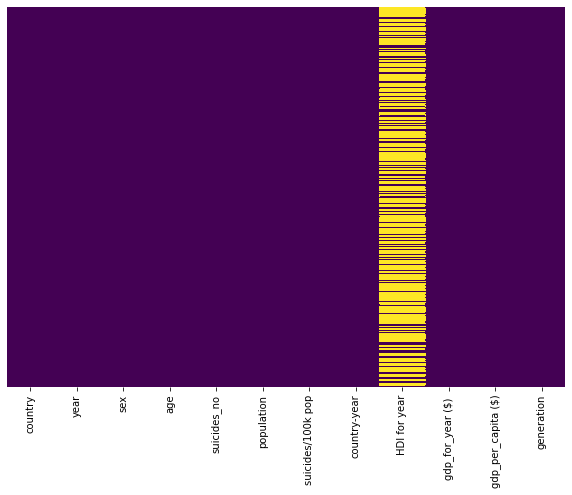

In [7]:
# Visualisasi data missing value 
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
# Variabel HDI for year mengandung lebih dari 30% missing value dan variabel country-year tidak relevan maka variabel dihapus
del(data['HDI for year']); del(data['country-year'])
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,63067077179,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,63067077179,2309,Generation Z


In [9]:
# Melakukan cek missing value
np.sum(data.isnull())

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
gdp_for_year ($)      0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [10]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'gdp_for_year ($) ', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

In [11]:
#melakukan penggantian nama variabel agar mudah dimengerti
data=data.rename(columns={'country':'Negara','year':'Tahun','sex':'JenisKelamin','age':'Usia','suicides_no':'AngkaBunuhDiri','population':'Populasi','suicides/100k pop':'BunuhdiriPer100kPop','gdp_for_year ($) ':'GDPperTahun','gdp_per_capita ($)':'GDPperKapita','generation':'Generasi'})
data

,Negara,Tahun,JenisKelamin,Usia,AngkaBunuhDiri,Populasi,BunuhdiriPer100kPop,GDPperTahun,GDPperKapita,Generasi
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,63067077179,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,63067077179,2309,Generation Z


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Negara               27820 non-null  object 
 1   Tahun                27820 non-null  int64  
 2   JenisKelamin         27820 non-null  object 
 3   Usia                 27820 non-null  object 
 4   AngkaBunuhDiri       27820 non-null  int64  
 5   Populasi             27820 non-null  int64  
 6   BunuhdiriPer100kPop  27820 non-null  float64
 7   GDPperTahun          27820 non-null  int64  
 8   GDPperKapita         27820 non-null  int64  
 9   Generasi             27820 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 2.1+ MB


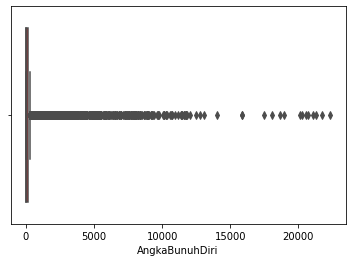

In [13]:
#Deteksi Outlier
#Membuat boxplot variabel Angka Bunuh Diri
sns.boxplot(data["AngkaBunuhDiri"], color='red')
plt.show()

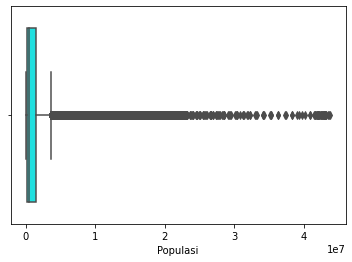

In [14]:
#Membuat boxplot variabel Populasi
sns.boxplot(data["Populasi"], color='aqua')
plt.show()

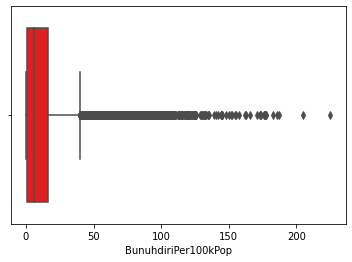

In [15]:
#Membuat boxplot variabel BunuhdiriPer100kPop
sns.boxplot(data["BunuhdiriPer100kPop"], color='red')
plt.show()

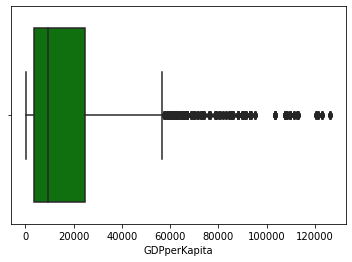

In [16]:
#Membuat boxplot variabel GDPperKapita
sns.boxplot(data["GDPperKapita"], color='Green')
plt.show()

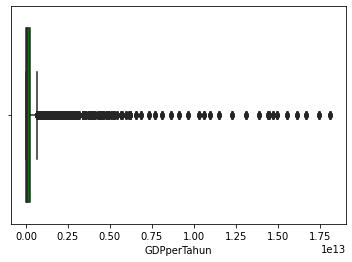

In [17]:
#Membuat boxplot variabel GDPperTahun
sns.boxplot(data["GDPperTahun"], color='Green')
plt.show()

#Summary Statistics dan Visualisasi Data

In [18]:
#Statistika Deskriptif
data.describe()

,Tahun,AngkaBunuhDiri,Populasi,BunuhdiriPer100kPop,GDPperTahun,GDPperKapita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,1.812071e+13,126352.000000


In [19]:
data.groupby(["JenisKelamin"])["AngkaBunuhDiri"].sum().reset_index()

,JenisKelamin,AngkaBunuhDiri
0,female,1559510
1,male,5188910


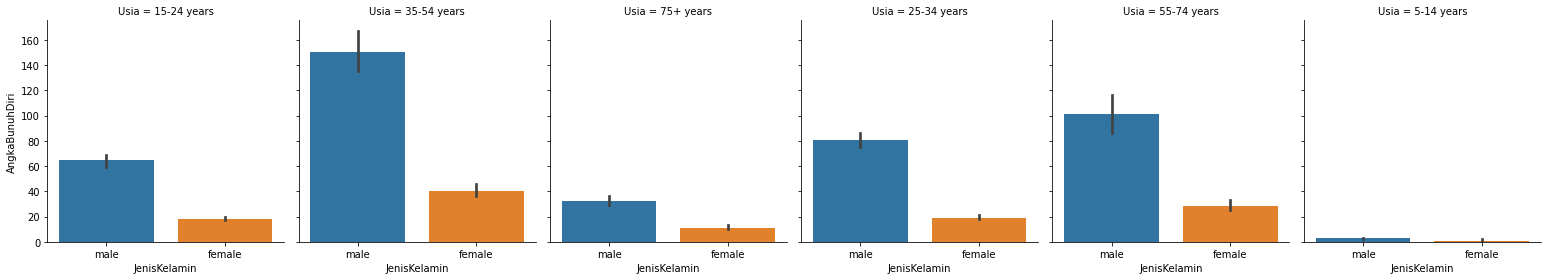

In [20]:
from numpy import median
ax = sns.catplot(x="JenisKelamin", y="AngkaBunuhDiri",col='Usia', data=data, estimator=median, height=4, aspect=.9,kind='bar')

In [21]:
data.groupby(by=['Usia','JenisKelamin'])['AngkaBunuhDiri'].sum().unstack().reset_index().melt(id_vars='Usia')

,Usia,JenisKelamin,value
0,15-24 years,female,175437
1,25-34 years,female,208823
2,35-54 years,female,506233
3,5-14 years,female,16997
4,55-74 years,female,430036
5,75+ years,female,221984
6,15-24 years,male,633105
7,25-34 years,male,915089
8,35-54 years,male,1945908
9,5-14 years,male,35267


In [0]:
def country_year_range(data, start=None, end=None):
    if (start == None) and (end == None):
        data = data
    
    elif end == None:
        data = data.query('Tahun >= @start')
        
    elif start == None:
        data = data.query('Tahun <= @end')
        
    else:
        year_range = np.arange(start, end+1)
        data = data.query('Tahun in @year_range')
    
    # Menggabungkan setiap kolom dengan benar.
    agg_dict = {'Negara':'count', 'Tahun':'nunique',
                'AngkaBunuhDiri':'sum', 'Populasi':'sum',}
    df = data[['Negara', 'Tahun',
               'AngkaBunuhDiri', 'Populasi']].groupby('Negara').aggregate(agg_dict)

    # Membuat feature
    df['Rata-rata Bunuh Diri per 100k'] = df['AngkaBunuhDiri'] * 1e5 / (df['Populasi'])

    df = df.drop(['Negara', 'AngkaBunuhDiri', 'Populasi'], axis=1)
    
    return df

In [0]:
country_data = country_year_range(data)

# Data negara setelah (dan termasuk) 2011
rec_country_data = country_year_range(data, start=2011)

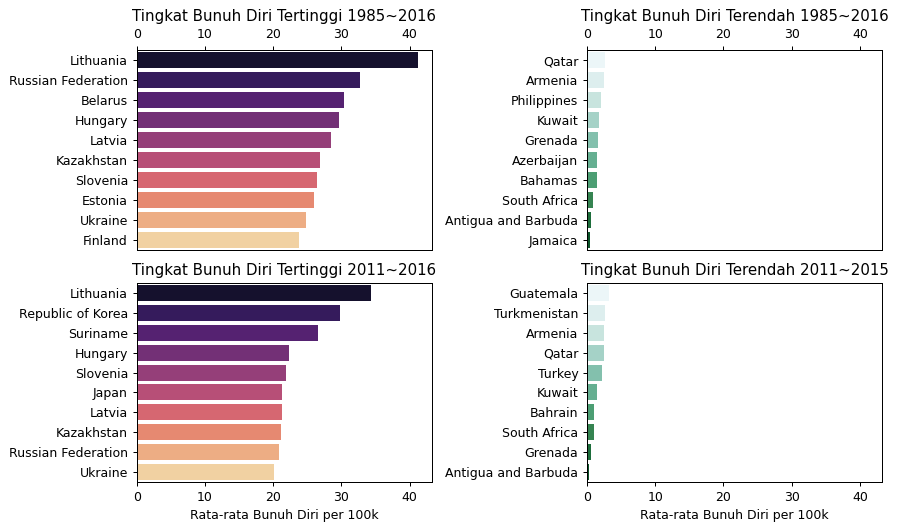

In [24]:
frequent_countries = country_data.sort_values('Rata-rata Bunuh Diri per 100k', ascending=False)
frequent_countries = frequent_countries.query("Tahun>= 15")

r_frequent_countries = rec_country_data.sort_values('Rata-rata Bunuh Diri per 100k', ascending=False)
r_frequent_countries = r_frequent_countries.query("Tahun>=4")


# Menentukan grafik 2 x 2
fig, (row1, row2) = plt.subplots(2,2, figsize=(10,6), dpi=90, sharex=True)


# Baris Pertama
# Grafik Kiri
row1[0].set_title('Tingkat Bunuh Diri Tertinggi 1985~2016')
sns.barplot(data=frequent_countries[:10], x='Rata-rata Bunuh Diri per 100k',
            y=frequent_countries[:10].index, ax=row1[0], palette='magma')
row1[0].xaxis.label.set_visible(False)
row1[0].yaxis.label.set_visible(False)
row1[0].xaxis.set_ticks_position('top')

# Grafik Kanan
row1[1].set_title('Tingkat Bunuh Diri Terendah 1985~2016')
sns.barplot(data=frequent_countries[-10:], x='Rata-rata Bunuh Diri per 100k',
            y=frequent_countries[-10:].index, ax=row1[1], palette='BuGn')
row1[1].xaxis.label.set_visible(False)
row1[1].yaxis.label.set_visible(False)
row1[1].xaxis.set_ticks_position('top')


# Baris kedua
# Grafik Kiri
row2[0].set_title('Tingkat Bunuh Diri Tertinggi 2011~2016')
sns.barplot(data=r_frequent_countries[:10], x='Rata-rata Bunuh Diri per 100k',
            y=r_frequent_countries[:10].index, ax=row2[0], palette='magma')
row2[0].yaxis.label.set_visible(False)

# Grafik Kanan
row2[1].set_title('Tingkat Bunuh Diri Terendah 2011~2015')
sns.barplot(data=r_frequent_countries[-10:], x='Rata-rata Bunuh Diri per 100k',
            y=r_frequent_countries[-10:].index, ax=row2[1], palette='BuGn')
row2[1].yaxis.label.set_visible(False)

plt.tight_layout();

In [0]:
#Mengganti nama kelompok usia pertama sehingga library bisa memanggilnya secara alfabet 
data.Usia = data.Usia.replace({'5-14 years':'05-14 years'})

In [0]:
def demographic_country_filter(dataset, keep=None, remove=None):
    
    agg_dict = {'Tahun':'nunique', 'Populasi':'sum', 'AngkaBunuhDiri':'sum'}
    
    if keep == remove:
        #Tidak ada filter negara
        dataset = dataset.pivot_table(values=['AngkaBunuhDiri', 'Populasi'],
                                index='Usia', columns='JenisKelamin', aggfunc='sum')
        dataset['Rata-rata Bunuh Diri','male'] = 1e5*dataset['AngkaBunuhDiri','male']/dataset['Populasi','male']
        dataset['Rata-rata Bunuh Diri','female'] = 1e5*dataset['AngkaBunuhDiri','female']/dataset['Populasi','female']        
        return dataset

In [0]:
demo_all = demographic_country_filter(data)

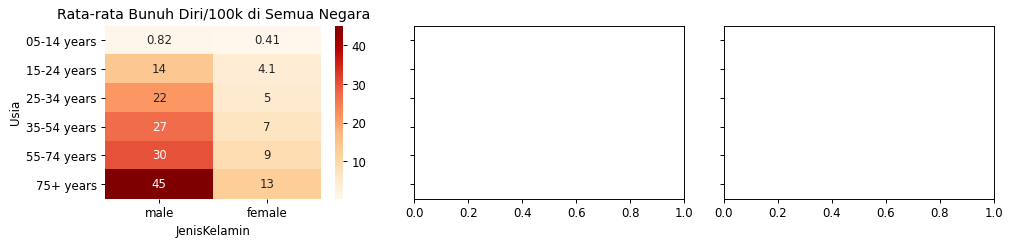

In [28]:
fig, axes = plt.subplots(1,3, figsize=(12,3), dpi=85, sharey=True)

sns.heatmap(data=demo_all['Rata-rata Bunuh Diri'], annot=True, ax=axes[0], vmax=45, cmap='OrRd')
axes[0].set_title('Rata-rata Bunuh Diri/100k di Semua Negara');
plt.tight_layout();

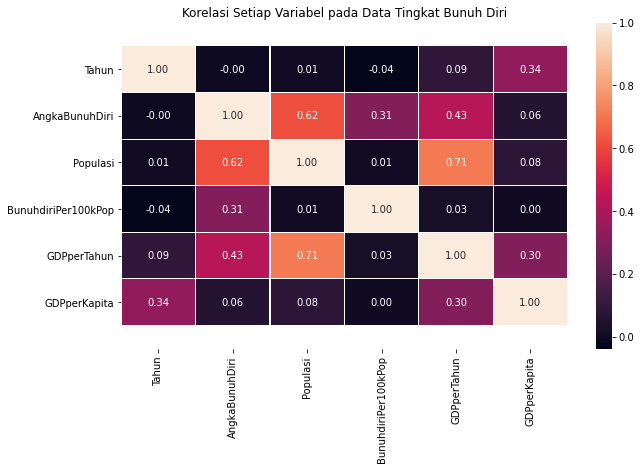

In [29]:
corr = data.corr()
f,ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr, annot=True, linewidths=.05,fmt= '.2f', ax=ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Korelasi Setiap Variabel pada Data Tingkat Bunuh Diri")
plt.show()

In [0]:
suic_sum = pd.DataFrame(data['AngkaBunuhDiri'].groupby(data['Negara']).sum())

In [0]:
import mpl_toolkits
mpl_toolkits.__path__.append('/usr/lib/python2.7/dist-packages/mpl_toolkits/')

In [32]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (158 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144433 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1b

In [33]:
!pip install pyproj==1.9.6

     |████████████████████████████████| 2.8MB 54kB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702109 sha256=ff662bfb2ec2f8e24cffe7744c97544b61715738af2c23edc6bc627163e9e548
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 2.6.1.post1
    Uninstalling pyproj-2.6.1.post1:
      Successfully uninstalled pyproj-2.6.1.post1


In [0]:
from mpl_toolkits.basemap import Basemap

In [36]:
from google.colab import files
upload = files.upload()
concap = pd.read_csv(io.BytesIO(upload['concap.csv']))
concap.head()

Saving concap.csv to concap.csv


,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Somaliland,Hargeisa,9.550000,44.050000,NaN,Africa
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667,TF,Antarctica
3,Palestine,Jerusalem,31.766667,35.233333,PS,Asia
4,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe


In [0]:
def reg(x):
    if x=='Russia':
        res = 'Russian Federation'
    else:
        res=x
    return res
concap['CountryName'] = concap['CountryName'].apply(reg)

data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         suic_sum,left_on='CountryName',right_on='Negara')

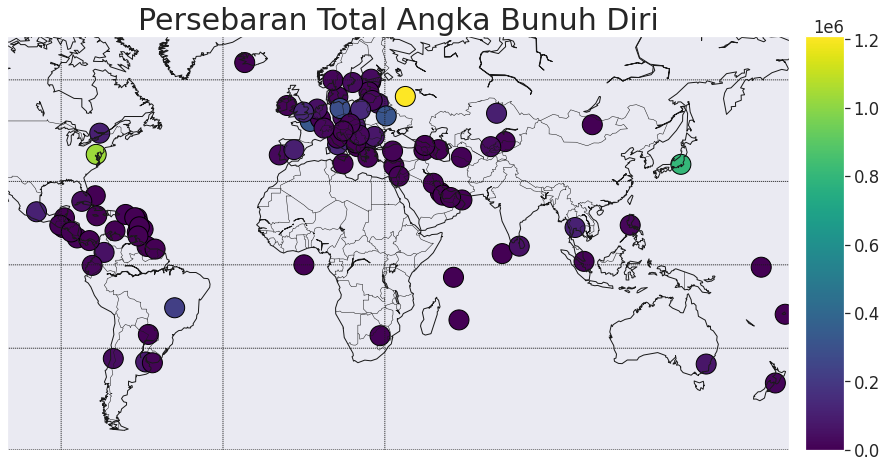

In [38]:
def mapWorld(col1,size2,title3,label4,metr=100,colmap='hot'):
    m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=70,\
            llcrnrlon=-110,urcrnrlon=180,resolution='c')
    m.drawcoastlines()
    m.drawcountries()
    m.drawparallels(np.arange(-90,91.,30.))
    m.drawmeridians(np.arange(-90,90.,60.))
    lat = data_full['CapitalLatitude'].values
    lon = data_full['CapitalLongitude'].values
    a_1 = data_full[col1].values
    if size2:
        a_2 = data_full[size2].values
    else: a_2 = 1
    m.scatter(lon, lat, latlon=True,c=a_1,s=metr*a_2,linewidth=1,edgecolors='black',cmap=colmap, alpha=1)
    
    cbar = m.colorbar()
    cbar.set_label(label4,fontsize=30)
    plt.title(title3, fontsize=30)
    plt.show()
sns.set(font_scale=1.5)
plt.figure(figsize=(15,15))
mapWorld(col1='AngkaBunuhDiri', size2=False,title3='Persebaran Total Angka Bunuh Diri',label4='',metr=400,colmap='viridis')

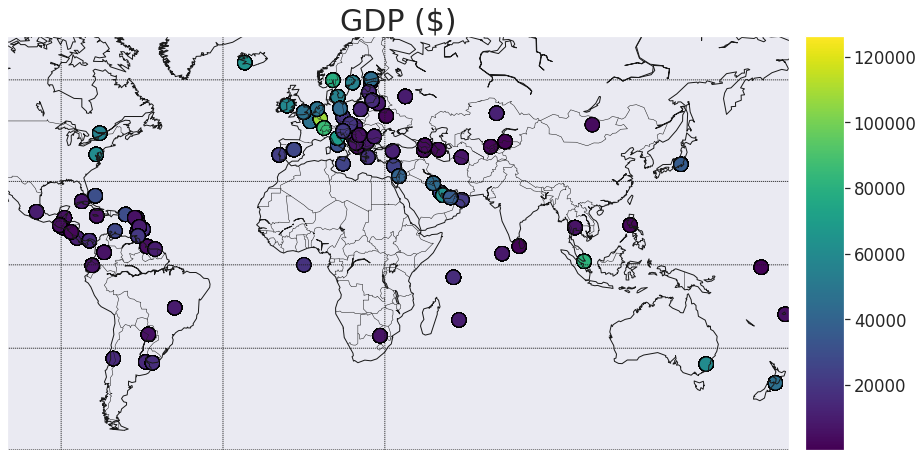

In [39]:
data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         data,left_on='CountryName',right_on='Negara')
plt.figure(figsize=(15,15))
mapWorld(col1='GDPperKapita', size2=False,title3='GDP ($)',label4='',metr=200,colmap='viridis')

In [0]:
suic_sum_yr = pd.DataFrame(data['AngkaBunuhDiri'].groupby([data['Generasi'],data['Negara']]).sum())
suic_sum_yr = suic_sum_yr.reset_index().sort_index(ascending=False)
most_cont = suic_sum_yr

data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         most_cont,left_on='CountryName',right_on='Negara')

 Generation X:100 
 Silent:200 
 G.I. Generation:300 
 Boomers:400 
 Millenials:500 
 Generation Z:600


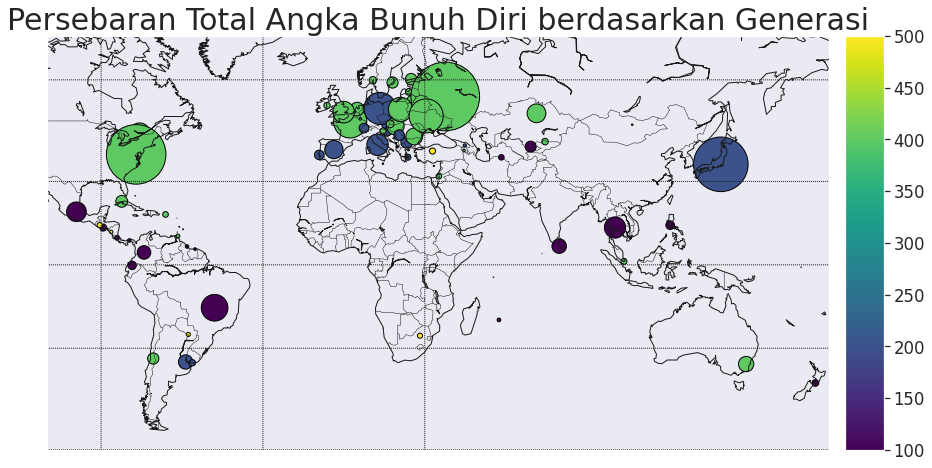

In [0]:
title_map = 'Persebaran Total Angka Bunuh Diri berdasarkan Generasi'
data_gener = pd.DataFrame(data['AngkaBunuhDiri'].groupby([data['Generasi'],data['Negara']]).sum()).reset_index()
age_max = pd.DataFrame(data_gener['AngkaBunuhDiri'].groupby(data_gener['Negara']).max()).reset_index()
gen_full = pd.merge(age_max,data_gener,left_on=['AngkaBunuhDiri','Negara'],right_on=['AngkaBunuhDiri','Negara'])

data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         gen_full,left_on='CountryName',right_on='Negara')
data_full.dropna(inplace=True)

def gener(x):
    dic_t = {'Generation X':100,'Silent':200,'G.I. Generation':300,'Boomers':400,'Millenials':500,'Generation Z':600}
    return dic_t[x]
data_full.Generasi = data_full.Generasi.apply(gener)
print(" Generation X:100 \n Silent:200 \n G.I. Generation:300 \n Boomers:400 \n Millenials:500 \n Generation Z:600")
plt.figure(figsize=(15,15))
mapWorld(col1='Generasi', size2='AngkaBunuhDiri', title3=title_map,label4='',metr=0.01,colmap='viridis')

#feature extraction : PCA

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [41]:
feature = data[["AngkaBunuhDiri","Populasi","GDPperTahun","GDPperKapita","BunuhdiriPer100kPop"]]
feature.tail()

,AngkaBunuhDiri,Populasi,GDPperTahun,GDPperKapita,BunuhdiriPer100kPop
27815,107,3620833,63067077179,2309,2.96
27816,9,348465,63067077179,2309,2.58
27817,60,2762158,63067077179,2309,2.17
27818,44,2631600,63067077179,2309,1.67
27819,21,1438935,63067077179,2309,1.46


In [0]:
#Standarization Data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(feature)

In [43]:
#Calculate covariance matrix
cov_mat = np.cov(X_std.T)

#Calculate covariance matrix (in addition)
#mean_vec = np.mean(X_std, axis=0)
#cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)

#Perform eigen decomposition on covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' %eig_vals)
print('Eigenvectors \n%s' %eig_vecs)


Eigenvalues 
[2.25879622 0.20879416 0.44774841 1.12854307 0.95629787]
Eigenvectors 
[[ 0.52527169  0.35120182  0.69212415  0.34226624 -0.06756418]
 [ 0.5888586  -0.73738046 -0.0680682  -0.0717763  -0.31580136]
 [ 0.5629584   0.53607411 -0.57147001 -0.26221214 -0.01921501]
 [ 0.19962634 -0.15649837  0.24829616 -0.49080977  0.79568359]
 [ 0.14339588 -0.14512118 -0.35791329  0.75369261  0.51207714]]


In [44]:

#Calculate Eigen Using Sklearn (As Performed Above)
pca=PCA(n_components=5)
X_pca = pca.fit(X_std).transform(X_std)
print('\nEigenvalues \n%s' %pca.explained_variance_)
print('Eigenvectors \n%s' %pca.components_)


Eigenvalues 
[2.25879622 1.12854307 0.95629787 0.44774841 0.20879416]
Eigenvectors 
[[ 0.52527169  0.5888586   0.5629584   0.19962634  0.14339588]
 [ 0.34226624 -0.0717763  -0.26221214 -0.49080977  0.75369261]
 [-0.06756418 -0.31580136 -0.01921501  0.79568359  0.51207714]
 [ 0.69212415 -0.0680682  -0.57147001  0.24829616 -0.35791329]
 [ 0.35120182 -0.73738046  0.53607411 -0.15649837 -0.14512118]]


[2.25879622 1.12854307 0.95629787 0.44774841 0.20879416]


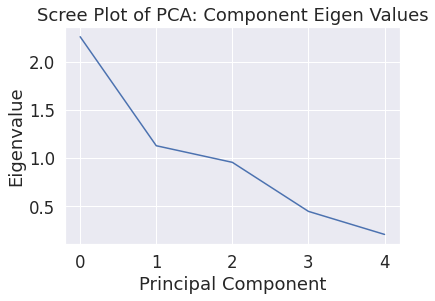

In [45]:
#Print Scree Plot
eigen_val = pca.explained_variance_
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot of PCA: Component Eigen Values')
plt.plot(eigen_val)
print(eigen_val)

[ 45.17  67.74  86.87  95.82 100.  ]


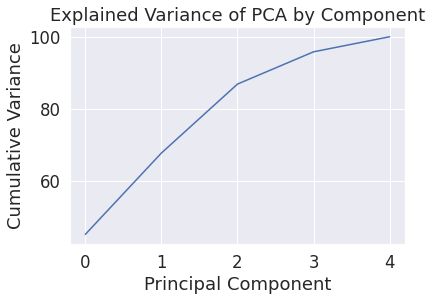

In [46]:
#cumulative variance explains (proportion)
var1=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance')
plt.title('Explained Variance of PCA by Component')
plt.plot(var1)
print(var1)

In [47]:
#looking at above plot (i'm taking 30variables)
pca=PCA(n_components=3)
pca.fit(X_std)
x1=pca.fit_transform(X_std)
print(x1)

[[-0.74740127  0.19892351 -0.69579194]
 [-0.76254567  0.13669734 -0.73607191]
 [-0.76918768  0.12196452 -0.74416708]
 ...
 [-0.35073855 -0.06198662 -0.95612282]
 [-0.38349085 -0.08553667 -0.95788745]
 [-0.57801308 -0.0807268  -0.86554947]]


In [48]:
feature1=pd.DataFrame(x1)
feature1.columns = ['Component 1', 'Component 2', 'Component 3']
feature1.head()

,Component 1,Component 2,Component 3
0,-0.747401,0.198924,-0.695792
1,-0.762546,0.136697,-0.736072
2,-0.769188,0.121965,-0.744167
3,-0.818902,0.112408,-0.728047
4,-0.786140,0.058739,-0.784410


In [49]:
#Examining the component loadings or components
PC = pca.components_
PC_trans = PC.transpose()
results = pd.DataFrame(PC_trans)
results.columns = ['Component 1', 'Component 2', 'Component 3']
results.index=feature.columns
results

,Component 1,Component 2,Component 3
AngkaBunuhDiri,0.525272,0.342266,-0.067564
Populasi,0.588859,-0.071776,-0.315801
GDPperTahun,0.562958,-0.262212,-0.019215
GDPperKapita,0.199626,-0.490810,0.795684
BunuhdiriPer100kPop,0.143396,0.753693,0.512077


#Classification

In [50]:
!pip install scikit-plot

In [0]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
import scikitplot as skplt

In [0]:
data.Generasi.replace(['Boomers', 'Generation X', 'Generation Z', 'G.I. Generation', 'Millenials', 'Silent'], 
                        ['0', '1', '2', '3', '4', '5'], inplace=True)

data.JenisKelamin.replace(['male', 'female'], ['0', '1'], inplace=True)

def means(arr):
    return str(np.array(arr).mean())
data.Usia.replace(['15-24 years', '25-34 years', '35-54 years', '05-14 years', '55-74 years', '75+ years'], 
                 [means([15, 24]), means([25, 34]), means([35, 54]), 
                  means([5, 14]), means([55, 74]), means([75])], inplace=True)

In [0]:
data.drop(['Negara', 'Tahun'], 1, inplace=True)

In [0]:
pd.to_numeric(data['Generasi']);
pd.to_numeric(data['JenisKelamin']);
pd.to_numeric(data['GDPperTahun']);

In [55]:
data['resiko'] = np.where(data['BunuhdiriPer100kPop']>data['BunuhdiriPer100kPop'].mean(), 1, 0)
data

,JenisKelamin,Usia,AngkaBunuhDiri,Populasi,BunuhdiriPer100kPop,GDPperTahun,GDPperKapita,Generasi,resiko
0,0,19.5,21,312900,6.71,2156624900,796,1,0
1,0,44.5,16,308000,5.19,2156624900,796,5,0
2,1,19.5,14,289700,4.83,2156624900,796,1,0
3,0,75.0,1,21800,4.59,2156624900,796,3,0
4,0,29.5,9,274300,3.28,2156624900,796,0,0
...,...,...,...,...,...,...,...,...,...
27815,1,44.5,107,3620833,2.96,63067077179,2309,1,0
27816,1,75.0,9,348465,2.58,63067077179,2309,5,0
27817,0,9.5,60,2762158,2.17,63067077179,2309,2,0
27818,1,9.5,44,2631600,1.67,63067077179,2309,2,0


In [0]:
X = np.array(data.drop(['resiko', 'BunuhdiriPer100kPop'], 1))
y = np.array(data.resiko)

In [0]:
for i in range (0,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Repeat Holdout

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15243
           1       1.00      1.00      1.00      7013

    accuracy                           1.00     22256
   macro avg       1.00      1.00      1.00     22256
weighted avg       1.00      1.00      1.00     22256

Test performance
-----------------------------------

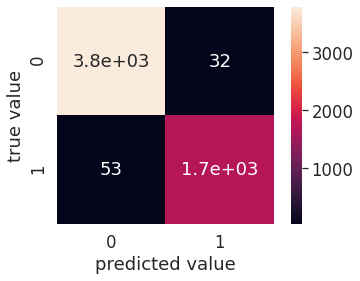

In [59]:
model_randomforest = RandomForestClassifier()
model_randomforest.fit(X_train, y_train)
y_train_hat1 = model_randomforest.predict(X_train)
y_test_hat1 = model_randomforest.predict(X_test)

print(model_randomforest)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat1))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat1))

cm = confusion_matrix(y_test, y_test_hat1)

result = model_randomforest.score(X_test, y_test)
print("Accuracy")
print('-------------------------------------------------------')
print('%.2f%%' % (result*100.0))
total=cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0]
sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("\nSensitivity") 
print('-------------------------------------------------------')
print('%.2f%%' % (sensitivity*100.0))
specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("\nSpecificity")
print('-------------------------------------------------------')
print("%.2f%%" % (specificity*100.0))

roc_auc_scorerf=roc_auc_score(y_test, y_test_hat1)
print('\nRoc_auc score')
print('-------------------------------------------------------')
print("%.2f%%" % (roc_auc_scorerf*100.0))
print('')
print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat1))


sns.heatmap(cm, square=True, annot=True, cbar=True)

plt.xlabel('predicted value')
plt.ylabel('true value');

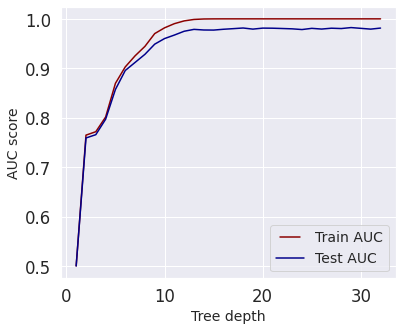

0.9813354718740493


In [60]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths: 
    model_rfrocauc = RandomForestClassifier(max_depth=max_depth)
    model_rfrocauc.fit(X_train, y_train)
    y_train_hat1 = model_rfrocauc.predict(X_train)
    y_test_hat1 = model_rfrocauc.predict(X_test)  
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_train_hat1)
    roc_aucrf = auc(false_positive_rate, true_positive_rate)

    # Add auc score to previous train results
    train_results.append(roc_aucrf)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_hat1)
    roc_aucrf = auc(false_positive_rate, true_positive_rate)

    # Add auc score to previous test results
    test_results.append(roc_aucrf)
    
plt.figure(figsize=(6, 5))
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'DarkRed', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'DarkBlue', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)}, fontsize=14)
plt.ylabel('AUC score', fontsize=14)
plt.xlabel('Tree depth', fontsize=14)
plt.show()
print(roc_aucrf)

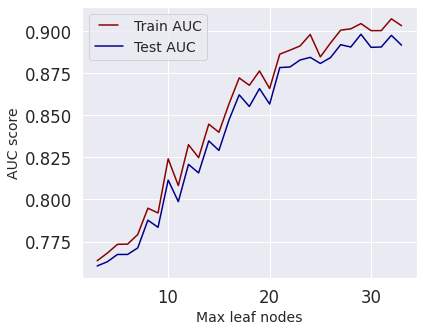

In [61]:
max_leaf_nodes = np.linspace(3, 33, 31, endpoint=True).astype(int)
train_results = []
test_results = []

for max_leaf_nodes in max_leaf_nodes: 
    model_rfrocauc1 = RandomForestClassifier(max_leaf_nodes=max_leaf_nodes, max_depth=7)
    model_rfrocauc1.fit(X_train, y_train)
    y_train_hat2 = model_rfrocauc1.predict(X_train)
    y_test_hat2 = model_rfrocauc1.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_train_hat2)
    roc_aucrff = auc(false_positive_rate, true_positive_rate)

    # Add auc score to previous train results
    train_results.append(roc_aucrff)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_hat2)

    roc_aucrff = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_aucrff)
    
plt.figure(figsize=(6, 5))
    
line1, = plt.plot(np.linspace(3, 33, 31, endpoint=True), train_results, 'DarkRed', label='Train AUC')
line2, = plt.plot(np.linspace(3, 33, 31, endpoint=True), test_results, 'DarkBlue', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)}, fontsize=14)
plt.ylabel('AUC score', fontsize=14)
plt.xlabel('Max leaf nodes', fontsize=14)
plt.show()

In [0]:
fpr, tpr, thresholds = roc_curve(y_test,y_test_hat1)

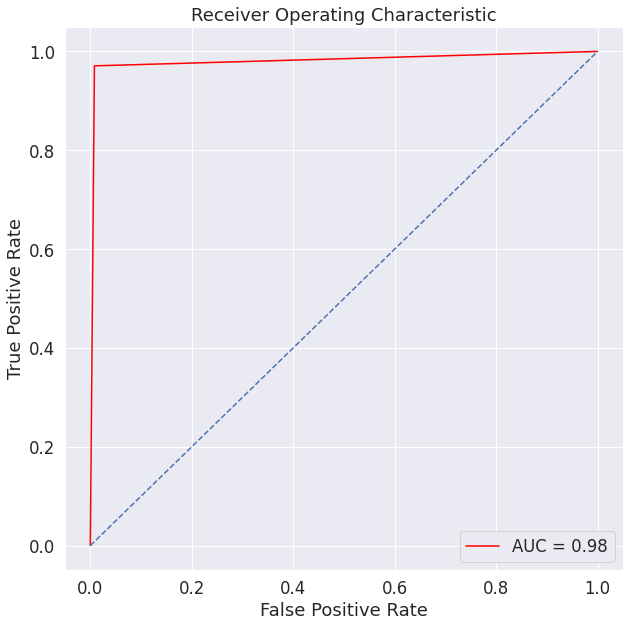

In [63]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_aucrf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

K-Fold

Train set: (22256, 7) (22256,)
Test set: (5564, 7) (5564,)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15219
           1       1.00      1.00      1.00      7037

    accuracy                           1.00     22256
   macro avg       1.00      1.00      1.00     22256
weighted avg       1.00      1.00      1.00     22256

Test performance
-----------------------------------

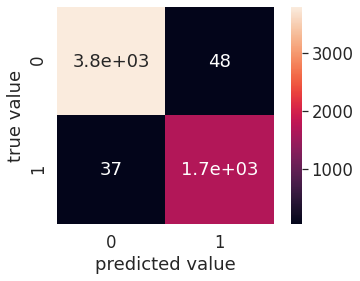

In [69]:
from sklearn import model_selection
from sklearn.model_selection import KFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)
KFold = model_selection.KFold(n_splits=10, random_state=100)
model_KFoldrf = RandomForestClassifier()
model_KFoldrf.fit(X_train, y_train)
y_train_hat = model_KFoldrf.predict(X_train)
y_test_hat = model_KFoldrf.predict(X_test)


print(model_KFoldrf)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

cm = confusion_matrix(y_test, y_test_hat)

results_KFold = model_selection.cross_val_score(model_KFoldrf, X, y, cv=KFold)
print("Accuracy")
print('-------------------------------------------------------')
print('%.2f%%' % (results_KFold.mean()*100.0))
total=cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0]
sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("\nSensitivity") 
print('-------------------------------------------------------')
print('%.2f%%' % (sensitivity*100.0))
specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("\nSpecificity")
print('-------------------------------------------------------')
print("%.2f%%" % (specificity*100.0))

roc_auc_kfoldrf=roc_auc_score(y_test, y_test_hat)
print('\nRoc_auc score')
print('-------------------------------------------------------')
print("%.2f%%" % (roc_auc_kfoldrf*100.0))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))


sns.heatmap(cm, square=True, annot=True, cbar=True)

plt.xlabel('predicted value')
plt.ylabel('true value');

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

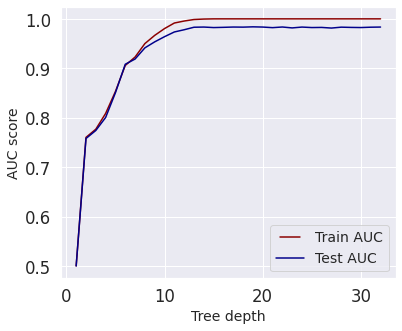

0.9834003534502513


In [70]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths: 
    KFold = model_selection.KFold(n_splits=10, random_state=100)
    model_KFoldrfrocauc = RandomForestClassifier(max_depth=max_depth)
    model_KFoldrfrocauc.fit(X_train, y_train)
    y_train_hat = model_KFoldrfrocauc.predict(X_train)
    y_test_hat = model_KFoldrfrocauc.predict(X_test)
            
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_train_hat)
    roc_aucrfk = auc(false_positive_rate, true_positive_rate)

    # Add auc score to previous train results
    train_results.append(roc_aucrfk)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_hat)
    roc_aucrfk = auc(false_positive_rate, true_positive_rate)

    # Add auc score to previous test results
    test_results.append(roc_aucrfk)
    
plt.figure(figsize=(6, 5))
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'DarkRed', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'DarkBlue', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)}, fontsize=14)
plt.ylabel('AUC score', fontsize=14)
plt.xlabel('Tree depth', fontsize=14)
plt.show()
print(roc_aucrfk)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

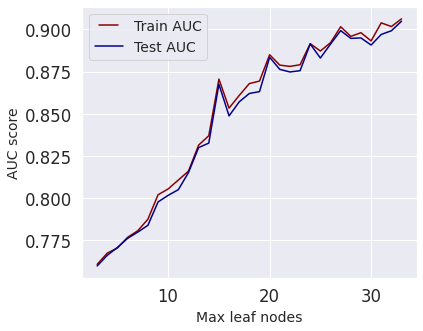

In [71]:
max_leaf_nodes = np.linspace(3, 33, 31, endpoint=True).astype(int)
train_results = []
test_results = []

for max_leaf_nodes in max_leaf_nodes: 
    KFold = model_selection.KFold(n_splits=10, random_state=100)
    model_KFoldrfrocauc1 = RandomForestClassifier(max_leaf_nodes=max_leaf_nodes, max_depth=7)
    model_KFoldrfrocauc1.fit(X_train, y_train)
    y_train_hat0 = model_KFoldrfrocauc1.predict(X_train)
    y_test_hat0 = model_KFoldrfrocauc1.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_train_hat0)
    roc_aucrfk1 = auc(false_positive_rate, true_positive_rate)

    # Add auc score to previous train results
    train_results.append(roc_aucrfk1)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_hat0)

    roc_aucrfk1 = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_aucrfk1)
    
plt.figure(figsize=(6, 5))
    
line1, = plt.plot(np.linspace(3, 33, 31, endpoint=True), train_results, 'DarkRed', label='Train AUC')
line2, = plt.plot(np.linspace(3, 33, 31, endpoint=True), test_results, 'DarkBlue', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)}, fontsize=14)
plt.ylabel('AUC score', fontsize=14)
plt.xlabel('Max leaf nodes', fontsize=14)
plt.show()

In [0]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,y_test_hat)

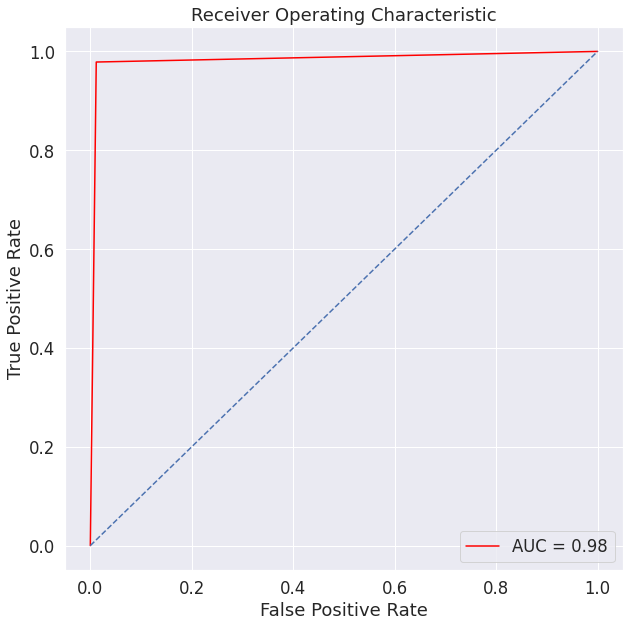

In [73]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_aucrfk)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Naive Bayes

repeated holdout

GaussianNB(priors=None, var_smoothing=1e-09)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.98      0.81     15219
           1       0.48      0.04      0.08      7037

    accuracy                           0.68     22256
   macro avg       0.59      0.51      0.44     22256
weighted avg       0.62      0.68      0.58     22256

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.98      0.81      3842
           1       0.53      0.05      0.09      1722

    accuracy                           0.69      5564
   macro avg       0.61      0.51      0.45      5564
weighted avg       0.64      0.69      0.59      5564

Accuracy
-------------------------------------------------------
69.21%

Sensitivity
-------------------------------------------------------
4.70%

Specif

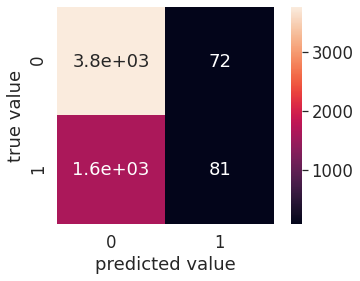

In [74]:
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
y_train_hatNB = model_NB.predict(X_train)
y_test_hatNB = model_NB.predict(X_test)

print(model_NB)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hatNB))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hatNB))

cm = confusion_matrix(y_test, y_test_hatNB)

result = model_NB.score(X_test, y_test)
print("Accuracy")
print('-------------------------------------------------------')
print('%.2f%%' % (result*100.0))
total=cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0]
sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("\nSensitivity") 
print('-------------------------------------------------------')
print('%.2f%%' % (sensitivity*100.0))
specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("\nSpecificity")
print('-------------------------------------------------------')
print("%.2f%%" % (specificity*100.0))

roc_auc_scoreNB=roc_auc_score(y_test, y_test_hatNB)
print('\nRoc_auc score')
print('-------------------------------------------------------')
print("%.2f%%" % (roc_auc_scoreNB*100.0))

print('\nConfusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hatNB))

sns.heatmap(cm, square=True, annot=True, cbar=True)

plt.xlabel('predicted value')
plt.ylabel('true value');

In [0]:
fpr, tpr, thresholds = roc_curve(y_test,y_test_hatNB)

No handles with labels found to put in legend.


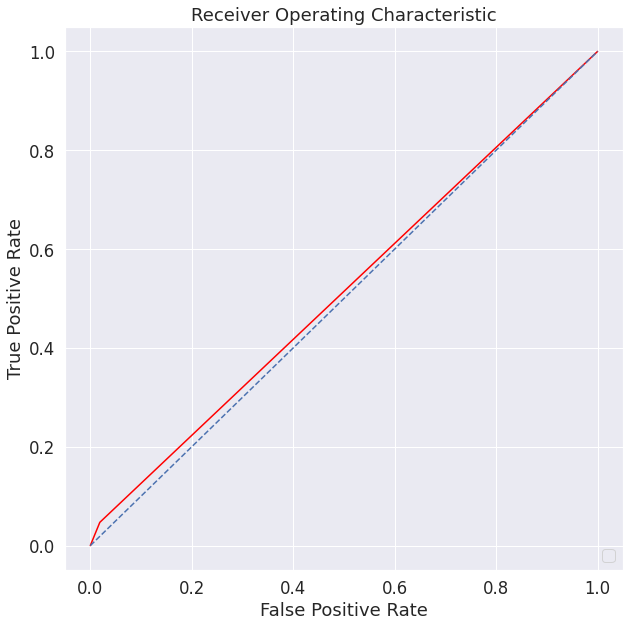

In [76]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

KFOLD

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GaussianNB(priors=None, var_smoothing=1e-09)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15219
           1       1.00      1.00      1.00      7037

    accuracy                           1.00     22256
   macro avg       1.00      1.00      1.00     22256
weighted avg       1.00      1.00      1.00     22256

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.98      0.81      3842
           1       0.53      0.05      0.09      1722

    accuracy                           0.69      5564
   macro avg       0.61      0.51      0.45      5564
weighted avg       0.64      0.69      0.59      5564

Accuracy
-------------------------------------------------------
67.97%

Sensitivity
-------------------------------------------------------
4.70%

Specif

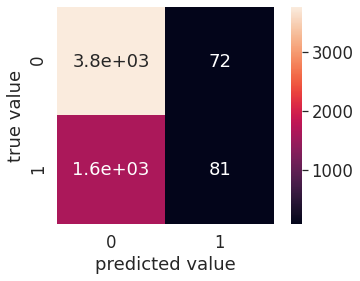

In [79]:
KFold = model_selection.KFold(n_splits=10, random_state=100)
model_KFoldNB = GaussianNB()
model_KFoldNB.fit(X_train, y_train)
y_train_hatNBK = model_KFoldNB.predict(X_train)
y_test_hatNBK = model_KFoldNB.predict(X_test)

print(model_KFoldNB)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hatNBK))

cm = confusion_matrix(y_test, y_test_hatNBK)

results_KFoldNB = model_selection.cross_val_score(model_KFoldNB, X, y, cv=KFold)
print("Accuracy")
print('-------------------------------------------------------')
print('%.2f%%' % (results_KFoldNB.mean()*100.0))
total=cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0]
sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("\nSensitivity") 
print('-------------------------------------------------------')
print('%.2f%%' % (sensitivity*100.0))
specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("\nSpecificity")
print('-------------------------------------------------------')
print("%.2f%%" % (specificity*100.0))

roc_auc_scoreNBK=roc_auc_score(y_test, y_test_hatNBK)
print('\nRoc_auc score')
print('-------------------------------------------------------')
print("%.2f%%" % (roc_auc_scoreNBK*100.0))

print('\nConfusion matrix')
print('-------------------------------------------------------')
print(cm)
sns.heatmap(cm, square=True, annot=True, cbar=True)

plt.xlabel('predicted value')
plt.ylabel('true value');

In [0]:
fpr, tpr, thresholds = roc_curve(y_test,y_test_hatNBK)

No handles with labels found to put in legend.


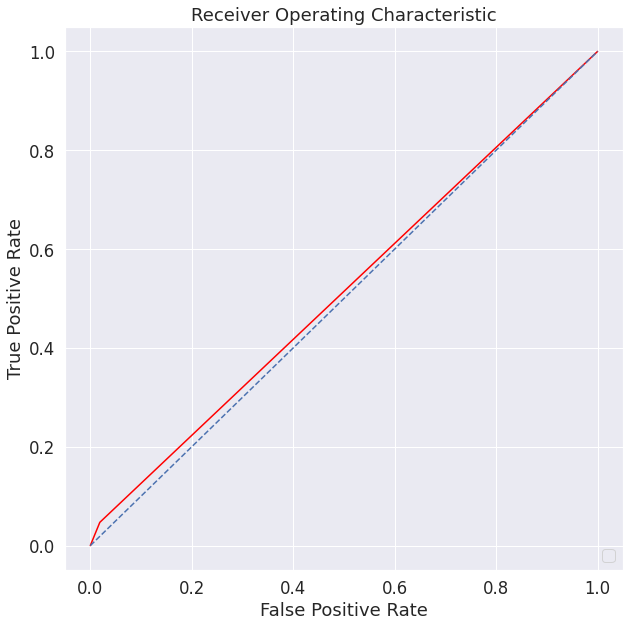

In [83]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()